# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
data_path = ""
# maybe remember to install tensorflow with the version I have here

# 2. Loading the dataset

In [3]:
# link: 
df = pd.read_excel(data_path+"dataset/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# check if there are missing values in the dataset
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# 3. Train/test splitting and normalization

In [5]:
df_columns = list(df.columns)
df_columns.remove('Class')
features = df_columns
print(features)

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [6]:
X = df[features]
y = df['Class']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y_num = encoder.fit_transform(y)
y_one_hot = pd.get_dummies(y)

indices = np.arange(len(X))

(
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    train_indices, 
    test_indices)= train_test_split(X, y, indices, test_size = 0.3, random_state = 40)

y_train_num = y_num[train_indices]
y_test_num = y_num[test_indices]

y_train_one_hot = y_one_hot.iloc[train_indices]
y_test_one_hot = y_one_hot.iloc[test_indices]

# 4. Accuracy report function

In [7]:
def accuracy_report(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc_report = {}
    labels = np.unique(y_test)
    AA = 0
    for label in labels:
        per_class_acc = cm[label,label]/np.sum(cm[label,:]) * 100
        acc_report["class " + str(label)] = per_class_acc
        AA+=per_class_acc
    AA = AA/len(labels)
    acc_report["OA"] = accuracy_score(y_test, y_pred)*100
    acc_report["AA"] = AA
    
    return acc_report

# 5. Artificial Neural Network Classification
## 5.1.  hidden nodes = 32

## 5.1.1. Building the network

In [8]:
LR = 0.0001

In [9]:
N_input = X_train.shape[1]
N_output = y_train_one_hot.shape[1]

ann_model = Sequential()
ann_model.add(Dense(N_input*2, input_dim=N_input, activation='relu'))
ann_model.add(Dense(N_output, activation='softmax'))

optim = keras.optimizers.Adam(lr=LR)
ann_model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy']) # is binary_cross right?
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________


## 5.1.2. Training the network

In [10]:
epochs=10
batch_size=10

history = ann_model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size)

Epoch 1/10
953/953 [==============================] - 1s 1ms/step - loss: 0.3936 - accuracy: 0.2282
Epoch 2/10
953/953 [==============================] - 1s 1ms/step - loss: 0.3510 - accuracy: 0.4093
Epoch 3/10
953/953 [==============================] - 1s 1ms/step - loss: 0.3152 - accuracy: 0.4804
Epoch 4/10
953/953 [==============================] - 1s 1ms/step - loss: 0.2818 - accuracy: 0.5398
Epoch 5/10
953/953 [==============================] - 1s 1ms/step - loss: 0.2521 - accuracy: 0.6629
Epoch 6/10
953/953 [==============================] - 1s 1ms/step - loss: 0.2261 - accuracy: 0.7387
Epoch 7/10
953/953 [==============================] - 1s 1ms/step - loss: 0.2036 - accuracy: 0.7851
Epoch 8/10
953/953 [==============================] - 1s 1ms/step - loss: 0.1844 - accuracy: 0.8246
Epoch 9/10
953/953 [==============================] - 1s 1ms/step - loss: 0.1683 - accuracy: 0.8482
Epoch 10/10
953/953 [==============================] - 1s 1ms/step - loss: 0.1548 - accuracy: 0.8640

## 5.1.3. Plotting training performance

In [11]:
training_acc = history.history["accuracy"]
training_loss = history.history["loss"]

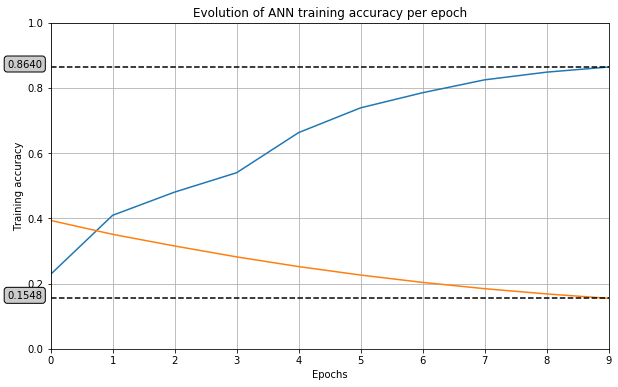

In [18]:
plt.figure(figsize=(10,6))
plt.plot(training_acc)
plt.plot(training_loss)
plt.plot(np.ones(len(training_acc))*training_acc[-1], color='k',linestyle = 'dashed')
plt.plot(np.ones(len(training_loss))*training_loss[-1], color='k',linestyle = 'dashed')

bbox = dict(boxstyle ="round", fc ="0.8")
plt.annotate("{:.4f}".format(training_acc[-1]), 
             xy =(0, training_acc[-1]),
             xytext =(-0.7, training_acc[-1]), 
             bbox=bbox)
plt.annotate("{:.4f}".format(training_loss[-1]), 
             xy =(0, training_loss[-1]),
             xytext =(-0.7, training_loss[-1]), 
             bbox=bbox)
plt.xlim([0, epochs-1])
plt.ylim([0, 1])
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.title("Evolution of ANN training accuracy per epoch")
plt.grid()
plt.show()

# add index for acc and loss

## 5.1.4. Testing the network

##### a. Getting the prediction array

In [23]:
# getting the predictions array
y_ann_pred = ann_model.predict(X_test)

# normalizing the predictions array and displaying the accuracy report
y_pred_num = [np.argmax(y_pred_elt) for y_pred_elt in y_ann_pred]
acc_report = accuracy_report(y_test_num, y_pred_num)
acc_report_df = pd.DataFrame(data=[round(acc,2) for acc in acc_report.values()], 
                             index=acc_report.keys(), 
                             columns=["ANN accuracy (%)"])
acc_report_df

,ANN accuracy (%)
class 0,47.47
class 1,99.32
class 2,93.49
class 3,96.01
class 4,95.93
class 5,93.69
class 6,72.54
OA,86.12
AA,85.49


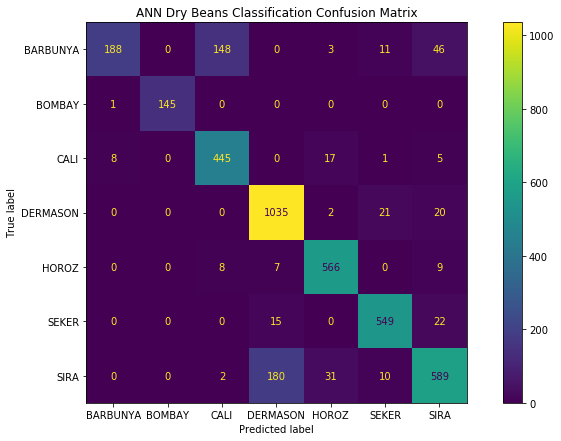

In [24]:
y_pred = encoder.inverse_transform(y_pred_num)
cm_ann = confusion_matrix(y_test,y_pred)
cm_ann = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ann,display_labels=np.unique(y))
_, ax = plt.subplots(figsize=(13, 7))
disp.plot(ax=ax)
plt.title("ANN Dry Beans Classification Confusion Matrix")
plt.show()

Inceasing the number of epochs and/or the number of hidden nodes will improve the classification results. However, a deep neural network (multiple hidden layers) will improve the accuracy results with a small number of epochs.

# 6. Deep Neural Network Classification

## 6.1. Building the network

In [26]:
LR = 0.0001
N_input = X_train.shape[1]
N_output = y_train_one_hot.shape[1]

dnn_model = Sequential()
dnn_model.add(Dense(N_input*500, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_input*500, activation='relu'))
dnn_model.add(Dense(N_input*500, activation='relu'))
# dnn_model.add(Dense(N_input*500, input_dim=N_input, activation='relu'))
# dnn_model.add(Dense(N_input*500, input_dim=N_input, activation='relu'))
# dnn_model.add(Dense(N_input*500, input_dim=N_input, activation='relu'))
# dnn_model.add(Dense(N_input*500, input_dim=N_input, activation='relu'))
dnn_model.add(Dense(N_output, activation='softmax'))

optim = keras.optimizers.Adam(lr=LR)
dnn_model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy']) # is binary_cross right?
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8000)              136000    
_________________________________________________________________
dense_11 (Dense)             (None, 8000)              64008000  
_________________________________________________________________
dense_12 (Dense)             (None, 8000)              64008000  
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 56007     
Total params: 128,208,007
Trainable params: 128,208,007
Non-trainable params: 0
_________________________________________________________________


## 6.2. Training the network

In [27]:
epochs=10
batch_size=10

In [ ]:
history = dnn_model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size)

Epoch 1/10
953/953 [==============================] - 1079s 1s/step - loss: 0.0980 - accuracy: 0.8586
Epoch 2/10
953/953 [==============================] - 1298s 1s/step - loss: 0.0771 - accuracy: 0.8929
Epoch 3/10
953/953 [==============================] - 908s 953ms/step - loss: 0.0708 - accuracy: 0.9028
Epoch 4/10
953/953 [==============================] - 917s 962ms/step - loss: 0.0689 - accuracy: 0.9045
Epoch 5/10
953/953 [==============================] - 920s 966ms/step - loss: 0.0679 - accuracy: 0.9073
Epoch 6/10
740/953 [======================>.......] - ETA: 20:53 - loss: 0.0670 - accuracy: 0.9081

## 6.3. Plotting training performance

In [ ]:
training_acc = history.history["accuracy"]
training_loss = history.history["loss"]

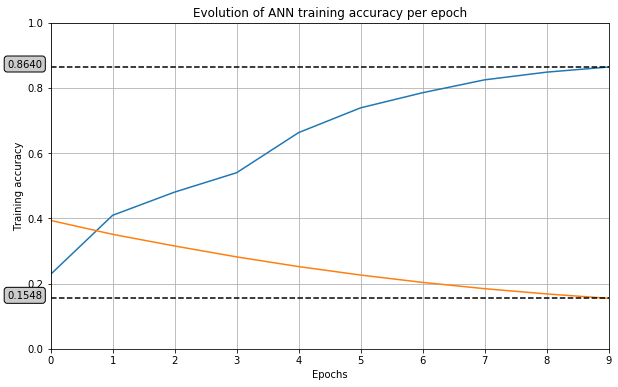

In [18]:
plt.figure(figsize=(10,6))
plt.plot(training_acc)
plt.plot(training_loss)
plt.plot(np.ones(len(training_acc))*training_acc[-1], color='k',linestyle = 'dashed')
plt.plot(np.ones(len(training_loss))*training_loss[-1], color='k',linestyle = 'dashed')

bbox = dict(boxstyle ="round", fc ="0.8")
plt.annotate("{:.4f}".format(training_acc[-1]), 
             xy =(0, training_acc[-1]),
             xytext =(-0.7, training_acc[-1]), 
             bbox=bbox)
plt.annotate("{:.4f}".format(training_loss[-1]), 
             xy =(0, training_loss[-1]),
             xytext =(-0.7, training_loss[-1]), 
             bbox=bbox)
plt.xlim([0, epochs-1])
plt.ylim([0, 1])
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")
plt.title("Evolution of ANN training accuracy per epoch")
plt.grid()
plt.show()

# add index for acc and loss

## 6.4. Testing the network

In [23]:
# getting the predictions array
y_dnn_pred = ann_model.predict(X_test)

# normalizing the predictions array and displaying the accuracy report
y_pred_num = [np.argmax(y_pred_elt) for y_pred_elt in y_dnn_pred]
acc_report = accuracy_report(y_test_num, y_pred_num)
acc_report_df["DNN accuracy (%)"] = acc_report_df
acc_report_df

,ANN accuracy (%)
class 0,47.47
class 1,99.32
class 2,93.49
class 3,96.01
class 4,95.93
class 5,93.69
class 6,72.54
OA,86.12
AA,85.49


In [210]:
y_pred_num = [y_oh_pred[i].index(1) for i in range(len(y_oh_pred))]
acc_report = accuracy_report(y_test_num, y_pred_num)

for key in acc_report:
    print(key, " = ", "{:.2f}".format(acc_report[key]), " %")

class 0  =  93.43  %
class 1  =  100.00  %
class 2  =  93.91  %
class 3  =  93.41  %
class 4  =  94.58  %
class 5  =  93.86  %
class 6  =  87.56  %
OA  =  92.78  %
AA  =  93.82  %
